# PROJETO PRÁTICO CODENATION ACELERADEV DS

## Escopo do Projeto

**Objetivo**

O objetivo deste produto é fornecer um serviço automatizado que recomenda leads para um usuário dado sua atual lista de clientes (Portfólio).

---



**Contextualização**


Algumas empresas gostariam de saber quem são as demais empresas em um determinado mercado (população) que tem maior probabilidade se tornarem seus próximos clientes. Ou seja, a sua solução deve encontrar no mercado quem são os leads mais aderentes dado as características dos clientes presentes no portfólio do usuário.

Além disso, sua solução deve ser agnóstica ao usuário. Qualquer usuário com uma lista de clientes que queira explorar esse mercado pode extrair valor do serviço.

---



**Requisitos de Negócio**

Para o desafio, deverão ser consideradas as seguintes bases:

**Mercado:** 

Base com informações sobre as empresas do Mercado a ser considerado. Portfolio 1: Ids dos clientes da empresa 1 Portfolio 2: Ids dos clientes da empresa 2 Portfolio 3: Ids dos clientes da empresa 3

Obs: todas as empresas(ids) dos portfolios estão contidos no Mercado(base de população).

**Bases de Estudo**

Link para download das bases Mercado, Portfolio 1, Portfolio 2 e Portfolio 3 respectivamente:

https://codenation-challenges.s3-us-west-1.amazonaws.com/ml-leads/estaticos_market.csv.zip

https://codenation-challenges.s3-us-west-1.amazonaws.com/ml-leads/estaticos_portfolio1.csv

https://codenation-challenges.s3-us-west-1.amazonaws.com/ml-leads/estaticos_portfolio2.csv

https://codenation-challenges.s3-us-west-1.amazonaws.com/ml-leads/estaticos_portfolio3.csv

As bases de portfólio poderão ser utilizadas para testar a aderência da solução. Além disso, se a equipe desejar, poderá simular portfólios por meio de amostragens no mercado.

**Dicionário de variáveis**

https://s3-us-west-1.amazonaws.com/codenation-challenges/ml-leads/features_dictionary.pdf


---


**Requisitos técnicos obrigatórios**


Utilizar técnicas de data science e machine learning para desenvolver o projeto;
Apresentar o desenvolvimento e outputs do modelo em um Jupyter Notebook ou outra tecnologia de apresentação de Output de modelos de Machine Learning;
A análise deve considerar os seguintes pontos: análise exploratória dos dados, tratamento dos dados, avaliação de algoritmos, treinamento do modelo, avaliação de performance do modelo e visualização dos resultados;
Para a apresentação do projeto, o tempo entre o treinamento do modelo e o output deve ser menor que 20 min.

https://docs.google.com/document/d/1MROnrFg10M_9JWmnFAEpcFmLGoAIPNTDJKltSOUOx8Q/edit

---

**Link para a anális exploratória**


https://colab.research.google.com/drive/12Hi-GeEitn7gOWMCFVJl8EbvXSmaBaj0?usp=sharing

# BAIXANDO OS ARQUIVOS ORIGINAIS

In [ ]:
#importando as bibliotecas mais básicas:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from zipfile import ZipFile
#para setar o número de linhas e colunas visíveis no dataset
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)


### Abrindo os arquivos

In [ ]:
#abrindo o arquivo zip usando o zipfile, abrindo todos os arquivos finalizados em csv
zip_file = ZipFile('/content/estaticos_market.csv.zip')
dfs = {text_file.filename: pd.read_csv(zip_file.open(text_file.filename))
for text_file in zip_file.infolist() if text_file.filename.endswith('.csv')}
list(zip(dfs))


[('estaticos_market.csv',), ('__MACOSX/._estaticos_market.csv',)]

In [ ]:
#criando o DF de mercado
mercado = pd.DataFrame(dfs['estaticos_market.csv'])
mercado.head()

,Unnamed: 0,id,fl_matriz,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_empresa_anos,idade_emp_cat,fl_me,fl_sa,fl_epp,fl_mei,fl_ltda,dt_situacao,fl_st_especial,fl_email,fl_telefone,fl_rm,nm_divisao,nm_segmento,fl_spa,fl_antt,fl_veiculo,vl_total_tancagem,vl_total_veiculos_antt,vl_total_veiculos_leves,vl_total_veiculos_pesados,fl_optante_simples,qt_art,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,vl_total_tancagem_grupo,vl_total_veiculos_antt_grupo,vl_potenc_cons_oleo_gas,fl_optante_simei,sg_uf_matriz,de_saude_tributaria,de_saude_rescencia,nu_meses_rescencia,de_nivel_atividade,de_indicador_telefone,fl_simples_irregular,vl_frota,empsetorcensitariofaixarendapopulacao,nm_meso_regiao,nm_micro_regiao,fl_passivel_iss,qt_socios,qt_socios_pf,qt_socios_pj,idade_media_socios,idade_maxima_socios,idade_minima_socios,qt_socios_st_regular,qt_socios_st_suspensa,qt_socios_masculino,qt_socios_feminino,qt_socios_pep,qt_alteracao_socio_total,qt_alteracao_socio_90d,qt_alteracao_socio_180d,qt_alteracao_socio_365d,qt_socios_pj_ativos,qt_socios_pj_nulos,qt_socios_pj_baixados,qt_socios_pj_suspensos,qt_socios_pj_inaptos,vl_idade_media_socios_pj,vl_idade_maxima_socios_pj,vl_idade_minima_socios_pj,qt_coligados,qt_socios_coligados,qt_coligados_matriz,qt_coligados_ativo,qt_coligados_baixada,qt_coligados_inapta,qt_coligados_suspensa,qt_coligados_nula,idade_media_coligadas,idade_maxima_coligadas,idade_minima_coligadas,coligada_mais_nova_ativa,coligada_mais_antiga_ativa,idade_media_coligadas_ativas,coligada_mais_nova_baixada,coligada_mais_antiga_baixada,idade_media_coligadas_baixadas,qt_coligados_sa,qt_coligados_me,qt_coligados_mei,qt_coligados_ltda,qt_coligados_epp,qt_coligados_norte,qt_coligados_sul,qt_coligados_nordeste,qt_coligados_centro,qt_coligados_sudeste,qt_coligados_exterior,qt_ufs_coligados,qt_regioes_coligados,qt_ramos_coligados,qt_coligados_industria,qt_coligados_agropecuaria,qt_coligados_comercio,qt_coligados_serviço,qt_coligados_ccivil,qt_funcionarios_coligados,qt_funcionarios_coligados_gp,media_funcionarios_coligados_gp,max_funcionarios_coligados_gp,min_funcionarios_coligados_gp,vl_folha_coligados,media_vl_folha_coligados,max_vl_folha_coligados,min_vl_folha_coligados,vl_folha_coligados_gp,media_vl_folha_coligados_gp,max_vl_folha_coligados_gp,min_vl_folha_coligados_gp,faturamento_est_coligados,media_faturamento_est_coligados,max_faturamento_est_coligados,min_faturamento_est_coligados,faturamento_est_coligados_gp,media_faturamento_est_coligados_gp,max_faturamento_est_coligados_gp,min_faturamento_est_coligados_gp,total_filiais_coligados,media_filiais_coligados,max_filiais_coligados,min_filiais_coligados,qt_coligados_atividade_alto,qt_coligados_atividade_medio,qt_coligados_atividade_baixo,qt_coligados_atividade_mt_baixo,qt_coligados_atividade_inativo,qt_coligadas,sum_faturamento_estimado_coligadas,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,qt_ex_funcionarios,qt_funcionarios_grupo,percent_func_genero_masc,percent_func_genero_fem,idade_ate_18,idade_de_19_a_23,idade_de_24_a_28,idade_de_29_a_33,idade_de_34_a_38,idade_de_39_a_43,idade_de_44_a_48,idade_de_49_a_53,idade_de_54_a_58,idade_acima_de_58,grau_instrucao_macro_analfabeto,grau_instrucao_macro_escolaridade_fundamental,grau_instrucao_macro_escolaridade_media,grau_instrucao_macro_escolaridade_superior,grau_instrucao_macro_desconhecido,total,meses_ultima_contratacaco,qt_admitidos_12meses,qt_desligados_12meses,qt_desligados,qt_admitidos,media_meses_servicos_all,max_meses_servicos_all,min_meses_servicos_all,media_meses_servicos,max_meses_servicos,min_meses_servicos,qt_funcionarios,qt_funcionarios_12meses,qt_funcionarios_24meses,tx_crescimento_12meses,tx_crescimento_24meses,tx_rotatividade,qt_filiais
0,0,a6984c3ae395090e3bee8ad63c3758b110de096d5d8195...,True,SOCIEDADE EMPRESARIA LIMITADA,RN,ENTIDADES EMPRESARIAIS,INDUSTRIA DA CONSTRUCAO,CONSTRUÇÃO CIVIL,14.457534,10 a 15,False,Fal

In [ ]:
#Criando DataFrames dos portfólios
#mercado = pd.read_csv('/content/estaticos_market.csv')
portfolio_1 = pd.read_csv('https://codenation-challenges.s3-us-west-1.amazonaws.com/ml-leads/estaticos_portfolio1.csv')
portfolio_2 = pd.read_csv('https://codenation-challenges.s3-us-west-1.amazonaws.com/ml-leads/estaticos_portfolio2.csv')
portfolio_3 = pd.read_csv('https://codenation-challenges.s3-us-west-1.amazonaws.com/ml-leads/estaticos_portfolio3.csv')


# PRE-PROCESSAMENTO DE DADOS

## CRIANDO UM DF A PARTIR DAS FEATURES SELECIONADAS DURANTE A ANÁLISE EXPLORATÓRIA

In [ ]:
features = ['id','fl_matriz',
 'de_natureza_juridica',
 'sg_uf',
 'setor',
 'idade_emp_cat',
 'fl_email',
 'fl_telefone',
 'fl_rm',
 'nm_divisao',
 'nm_segmento',
 'fl_veiculo',
 'fl_optante_simples',
 'fl_optante_simei',
 'de_saude_tributaria',
 'de_nivel_atividade',
 'nm_meso_regiao',
 'nm_micro_regiao',
 'fl_passivel_iss',
 'qt_socios',
 'idade_media_socios',
 'de_faixa_faturamento_estimado',
 'de_faixa_faturamento_estimado_grupo',
 'qt_filiais']

In [ ]:
dados = mercado[features].copy()

## TRANSFORMA O INDEX EM ID

In [ ]:
#transformar o id em index
dados.set_index('id', inplace=True)

## ALTERA COLUNAS BOOLEANAS PARA BINÁRIAS

In [ ]:
#ALTERANDO OS DADOS BOOLEANOS PARA BINÁRIOS
dados = dados.replace({True: 1, False:0})

## TRANSFORMAÇÃO DE DADOS NUMÉRICOS EM CATEGÓRICOS

### FILIAIS

In [ ]:
# Criar classificação se contém filial ou não. Deletar "qt_filiais"
dados['contem_filial'] = [1 if n > 0 else 0 for n in dados['qt_filiais']]
del dados['qt_filiais']

### SÓCIOS

In [ ]:
#transformando a coluna qt_socios em categórica
dados.qt_socios.value_counts(normalize=True)
pd.cut(dados.qt_socios, bins=[-1,0,1,10,50,100,246], include_lowest=True, labels=['s/info', 'único dono', 'até 10', 'entre 10 e 50', 'entre 50 e 100', 'mais de 100'])

id
a6984c3ae395090e3bee8ad63c3758b110de096d5d819583a784a113726db849        até 10
6178f41ade1365e44bc2c46654c2c8c0eaae27dcb476c47fdef50b33f4f56f05    único dono
4a7e5069a397f12fdd7fd57111d6dc5d3ba558958efc02edc5147bc2a2535b08    único dono
3348900fe63216a439d2e5238c79ddd46ede454df7b9d8c24ac33eb21d4b21ef    único dono
1f9bcabc9d3173c1fe769899e4fac14b053037b953a1e4b102c769f7611ab29f    único dono
                                                                       ...    
469ee5fc984d0bb60aa2f40cda4d003d7c9b963d149ed3bf4c21dfa141c4dde1    único dono
656f496e7e2fad708f0022d8ad97d2cb9344e839a5f3cb6c5a6575047d41d2a0           NaN
9b933a5cf2149d1338f00fb459d34a16b9b0f2e8d3e8e1ff859a7a9228bd6cad    único dono
84db0f17467cf4f02439e01ade57150b6ac59d9dae53edb2f43d68b0e55fb766        até 10
3d43e934e150b86be1e67524f5ba1018b27da9ef25566d9c0607623ae7f25e3a    único dono
Name: qt_socios, Length: 462298, dtype: category
Categories (6, object): [s/info < único dono < até 10 < entre 10 e 50 < entre 5

In [ ]:
dados['socios_cat'] = pd.cut(dados.qt_socios, bins=[-1,0,1,10,50,100,246], include_lowest=True, labels=['s/info', 'único dono', 'até 10', 'entre 10 e 50', 'entre 50 e 100', 'mais de 100'])

In [ ]:
dados.drop(['qt_socios'], axis=1, inplace=True)

In [ ]:
#categorizando a idade média dos sócios
pd.cut(dados.idade_media_socios, bins=[-3,0,30,50,70,127], labels=['s/info', 'até 30 anos', 'entre 30 e 50', 'entre 50 e 70', 'mais de 70 anos'], include_lowest=True)

id
a6984c3ae395090e3bee8ad63c3758b110de096d5d819583a784a113726db849      entre 30 e 50
6178f41ade1365e44bc2c46654c2c8c0eaae27dcb476c47fdef50b33f4f56f05        até 30 anos
4a7e5069a397f12fdd7fd57111d6dc5d3ba558958efc02edc5147bc2a2535b08      entre 30 e 50
3348900fe63216a439d2e5238c79ddd46ede454df7b9d8c24ac33eb21d4b21ef      entre 30 e 50
1f9bcabc9d3173c1fe769899e4fac14b053037b953a1e4b102c769f7611ab29f                NaN
                                                                         ...       
469ee5fc984d0bb60aa2f40cda4d003d7c9b963d149ed3bf4c21dfa141c4dde1      entre 30 e 50
656f496e7e2fad708f0022d8ad97d2cb9344e839a5f3cb6c5a6575047d41d2a0                NaN
9b933a5cf2149d1338f00fb459d34a16b9b0f2e8d3e8e1ff859a7a9228bd6cad    mais de 70 anos
84db0f17467cf4f02439e01ade57150b6ac59d9dae53edb2f43d68b0e55fb766      entre 30 e 50
3d43e934e150b86be1e67524f5ba1018b27da9ef25566d9c0607623ae7f25e3a      entre 30 e 50
Name: idade_media_socios, Length: 462298, dtype: category
Categories (5, 

In [ ]:
dados['idade_media_socios_cat'] = pd.cut(dados.idade_media_socios, bins=[-2,0,30,50,70,127], labels=['s/info', 'até 30 anos', 'entre 30 e 50', 'entre 50 e 70', 'mais de 70 anos'])

In [ ]:
#excluindo a variável numérica categorizada 
dados.drop(['idade_media_socios'], axis=1, inplace= True)

## TRATA NULOS

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 462298 entries, a6984c3ae395090e3bee8ad63c3758b110de096d5d819583a784a113726db849 to 3d43e934e150b86be1e67524f5ba1018b27da9ef25566d9c0607623ae7f25e3a
Data columns (total 23 columns):
 #   Column                               Non-Null Count   Dtype   
---  ------                               --------------   -----   
 0   fl_matriz                            462298 non-null  int64   
 1   de_natureza_juridica                 462298 non-null  object  
 2   sg_uf                                462298 non-null  object  
 3   setor                                460371 non-null  object  
 4   idade_emp_cat                        462298 non-null  object  
 5   fl_email                             462298 non-null  int64   
 6   fl_telefone                          462298 non-null  int64   
 7   fl_rm                                462298 non-null  object  
 8   nm_divisao                           460371 non-null  object  
 9   nm_segmento         

In [ ]:
#TRATANDO NULOS
dados.fillna('s/info', inplace=True)

In [ ]:
dados.isna().sum().sum()

0

# PREPROCESSAMENTO

### TRANSFORMANDO TODAS AS COLUNAS EM CATEGÓRICAS

In [ ]:
#usando um laço para mudar o tipo da variável para string
for col in dados.columns:
    dados[col] = dados[col].astype(str)
 

In [ ]:
#conferindo a mudança nas colunas
dados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 462298 entries, a6984c3ae395090e3bee8ad63c3758b110de096d5d819583a784a113726db849 to 3d43e934e150b86be1e67524f5ba1018b27da9ef25566d9c0607623ae7f25e3a
Data columns (total 23 columns):
 #   Column                               Non-Null Count   Dtype 
---  ------                               --------------   ----- 
 0   fl_matriz                            462298 non-null  object
 1   de_natureza_juridica                 462298 non-null  object
 2   sg_uf                                462298 non-null  object
 3   setor                                462298 non-null  object
 4   idade_emp_cat                        462298 non-null  object
 5   fl_email                             462298 non-null  object
 6   fl_telefone                          462298 non-null  object
 7   fl_rm                                462298 non-null  object
 8   nm_divisao                           462298 non-null  object
 9   nm_segmento                          46229

##USANDO O LABEL ENCODER 


In [ ]:
#BAIXANDO BIBLIOTECAS E INSTANCIANDO OS OBJETOS
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# instanciando o LabelEncoder
le = LabelEncoder()


### Criando um X para lidar com o preprocessamento

In [ ]:
X = dados.copy()

In [ ]:
X.head()

,fl_matriz,de_natureza_juridica,sg_uf,setor,idade_emp_cat,fl_email,fl_telefone,fl_rm,nm_divisao,nm_segmento,fl_veiculo,fl_optante_simples,fl_optante_simei,de_saude_tributaria,de_nivel_atividade,nm_meso_regiao,nm_micro_regiao,fl_passivel_iss,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo,contem_filial,socios_cat,idade_media_socios_cat
id,,,,,,,,,,,,,,,,,,,,,,,
a6984c3ae395090e3bee8ad63c3758b110de096d5d819583a784a113726db849,1,SOCIEDADE EMPRESARIA LIMITADA,RN,CONSTRUÇÃO CIVIL,10 a 15,1,1,SIM,CONSTRUCAO DE EDIFICIOS,CONSTRUCAO,0.0,1.0,0.0,VERDE,ALTA,LESTE POTIGUAR,NATAL,1.0,"DE R$ 1.500.000,01 A R$ 4.800.000,00","DE R$ 1.500.000,01 A R$ 4.800.000,00",0,até 10,entre 30 e 50
6178f41ade1365e44bc2c46654c2c8c0eaae27dcb476c47fdef50b33f4f56f05,1,EMPRESARIO INDIVIDUAL,PI,SERVIÇO,1 a 5,1,1,SIM,ALIMENTACAO,ALOJAMENTO E ALIMENTACAO,0.0,s/info,s/info,CINZA,BAIXA,CENTRO NORTE PIAUIENSE,TERESINA,1.0,"DE R$ 81.000,01 A R$ 360.000,00","DE R$ 81.000,01 A R$ 360.000,00",0,único dono,até 30 anos
4a7e5069a397f12fdd7fd57111d6dc5d3ba558958efc02edc5147bc2a2535b08,1,EMPRESARIO INDIVIDUAL,AM,SERVIÇO,5 a 10,0,1,SIM,TRANSPORTE TERRESTRE,TRANSPORTE ARMAZENAGEM E CORREIO,0.0,1.0,1.0,AMARELO,MEDIA,CENTRO AMAZONENSE,MANAUS,1.0,"ATE R$ 81.000,00","ATE R$ 81.000,00",0,único dono,entre 30 e 50
3348900fe63216a439d2e5238c79ddd46ede454df7b9d8c24ac33eb21d4b21ef,1,EMPRESARIO INDIVIDUAL,AM,SERVIÇO,5 a 10,1,1,SIM,REPARACAO E MANUTENCAO DE EQUIPAMENTOS DE INFO...,OUTRAS ATIVIDADES DE SERVICOS,0.0,1.0,0.0,AMARELO,MEDIA,CENTRO AMAZONENSE,MANAUS,1.0,"DE R$ 81.000,01 A R$ 360.000,00","DE R$ 81.000,01 A R$ 360.000,00",0,único dono,entre 30 e 50
1f9bcabc9d3173c1fe769899e4fac14b053037b953a1e4b102c769f7611ab29f,1,EMPRESARIO INDIVIDUAL,RN,SERVIÇO,1 a 5,1,1,SIM,SERVICOS DE ARQUITETURA E ENGENHARIA TESTES E ...,ATIVIDADES PROFISSIONAIS CIENTIFICAS E TECNICAS,0.0,1.0,0.0,VERDE,ALTA,LESTE POTIGUAR,NATAL,1.0,"DE R$ 81.000,01 A R$ 360.000,00","DE R$ 81.000,01 A R$ 360.000,00",0,único dono,s/info


In [ ]:
# Categorical confirmando as variáveis categóricas
categorical_feature_mask = X.dtypes==object
# filtrar colunas categóricas e salvá-las numa lista
categorical_cols = X.columns[categorical_feature_mask].tolist()

In [ ]:
len(categorical_cols)

23

In [ ]:
# aplicando o LabelEncoder nas colunas categóricas - POR COLUNA usando uma função lambda
X[categorical_cols] = X[categorical_cols].apply(lambda col: le.fit_transform(col))
X.head(10)

,fl_matriz,de_natureza_juridica,sg_uf,setor,idade_emp_cat,fl_email,fl_telefone,fl_rm,nm_divisao,nm_segmento,fl_veiculo,fl_optante_simples,fl_optante_simei,de_saude_tributaria,de_nivel_atividade,nm_meso_regiao,nm_micro_regiao,fl_passivel_iss,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo,contem_filial,socios_cat,idade_media_socios_cat
id,,,,,,,,,,,,,,,,,,,,,,,
a6984c3ae395090e3bee8ad63c3758b110de096d5d819583a784a113726db849,1,60,4,2,1,1,1,1,32,10,0,1,0,4,0,6,48,1,2,2,0,0,1
6178f41ade1365e44bc2c46654c2c8c0eaae27dcb476c47fdef50b33f4f56f05,1,17,3,4,0,1,1,1,3,3,0,2,2,2,1,4,69,1,10,10,0,5,0
4a7e5069a397f12fdd7fd57111d6dc5d3ba558958efc02edc5147bc2a2535b08,1,17,1,4,3,0,1,1,86,20,0,1,1,0,2,2,43,1,1,1,0,5,1
3348900fe63216a439d2e5238c79ddd46ede454df7b9d8c24ac33eb21d4b21ef,1,17,1,4,3,1,1,1,74,17,0,1,0,0,2,2,43,1,10,10,0,5,1
1f9bcabc9d3173c1fe769899e4fac14b053037b953a1e4b102c769f7611ab29f,1,17,4,4,0,1,1,1,77,8,0,1,0,4,0,6,48,1,10,10,0,5,4
529a1f5fc6f88071db7d38492a0ce7c985c77e9b1c3bb62f5bd2ebec4860a392,1,60,4,3,5,0,0,0,55,13,0,0,0,3,0,11,50,0,10,10,0,4,4
8bf37c178778e537b108e58bf20552abe10c3a7fae129b04b52506188e7176da,1,17,2,4,3,1,0,1,86,20,0,1,1,0,2,8,0,1,1,1,0,5,2
0114fd3fbdc347c561843cde6aece12e8e53cb5d32c77dd2d5cb382605b7be79,1,17,4,4,4,1,1,1,1,5,0,2,2,6,0,6,48,1,12,11,0,5,1
6c45aabb849a760a3a7107c7a61262642f683feb8912a41a859f69fe4ce02b1c,1,12,1,3,1,0,1,0,56,13,0,1,0,1,0,2,49,1,10,10,0,0,1


#TESTE - RECOMENDADOR SKLEARN - Nearest Neighbours

In [ ]:
from sklearn.neighbors import NearestNeighbors

In [ ]:
nn = NearestNeighbors()

In [ ]:
#rodando o algoritmo e conferindo o tempo que leva para rodar
%time nn.fit(X)

CPU times: user 1min 47s, sys: 273 ms, total: 1min 47s
Wall time: 1min 47s


NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

#PREPARANDO OS PORTFÓLIOS

In [ ]:
#RESETANDO O INDEX DO X
base = X.reset_index()

In [ ]:
#AJUSTANDO OS PORTFOLIOS 2 E 3 que só possuem o id
port_2 = portfolio_2.merge(base, on='id')
port_3 = portfolio_3.merge(base, on='id')

In [ ]:
port_2.columns

Index(['Unnamed: 0', 'id', 'fl_matriz', 'de_natureza_juridica', 'sg_uf',
       'setor', 'idade_emp_cat', 'fl_email', 'fl_telefone', 'fl_rm',
       'nm_divisao', 'nm_segmento', 'fl_veiculo', 'fl_optante_simples',
       'fl_optante_simei', 'de_saude_tributaria', 'de_nivel_atividade',
       'nm_meso_regiao', 'nm_micro_regiao', 'fl_passivel_iss',
       'de_faixa_faturamento_estimado', 'de_faixa_faturamento_estimado_grupo',
       'contem_filial', 'socios_cat', 'idade_media_socios_cat'],
      dtype='object')

In [ ]:
port_2.drop(['Unnamed: 0'], axis=1, inplace=True)
port_3.drop(['Unnamed: 0'], axis=1, inplace=True)

In [ ]:
port_2.set_index('id', inplace=True)
port_3.set_index('id', inplace=True)

### Ajustando o portfolio 1

In [ ]:
port_1 = portfolio_1[['id']]

In [ ]:
port_1 = port_1.merge(base, on='id')
port_1.set_index('id', inplace=True)

### RECOMENDAÇÕES PARA O PORTFOLIO 1

In [ ]:
distances, indices = nn.kneighbors(port_1)

In [ ]:
recomendados_port1 = pd.DataFrame([X.iloc[indices[row,col]] for row in range(indices.shape[0]) for col in range(indices.shape[1])])

In [ ]:
recomendados_port1.shape

(2775, 23)

### Criando uma função para retornar a lista de empresas recomendadas

In [ ]:
#criando uma função de retorno
def busca_recomendacoes(portfolio):
  #busca as distâncias e os índices dos vizinhos, tendo o portfolio como parâmetro
  distances, indices = nn.kneighbors(portfolio)
  #cria um df com as variáveis encodadas com o Label Encoder, buscando direto do X
  df_teste = pd.DataFrame([X.iloc[indices[row,col]] for row in range(indices.shape[0]) for col in range(indices.shape[1])])
  # cria um df legível com as variáveis originais, usando o dados como padrão
  df_cliente = pd.DataFrame([dados.iloc[indices[row,col]] for row in range(indices.shape[0]) for col in range(indices.shape[1])])
  #retorna uma tupla com os dois dataframes
  return (df_teste, df_cliente.reset_index())
  



In [ ]:
%time recomendados_port1_metrics, recomendados_port1 = busca_recomendacoes(port_1)
recomendados_port2_metrics,recomendados_port2 = busca_recomendacoes(port_2)
recomendados_port3_metrics, recomendados_port3 = busca_recomendacoes(port_3)

CPU times: user 1.82 s, sys: 6.89 ms, total: 1.83 s
Wall time: 1.83 s


In [ ]:
recomendados_port2.shape

(2830, 24)

In [ ]:
recomendados_port2.head()

,index,fl_matriz,de_natureza_juridica,sg_uf,setor,idade_emp_cat,fl_email,fl_telefone,fl_rm,nm_divisao,nm_segmento,fl_veiculo,fl_optante_simples,fl_optante_simei,de_saude_tributaria,de_nivel_atividade,nm_meso_regiao,nm_micro_regiao,fl_passivel_iss,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo,contem_filial,socios_cat,idade_media_socios_cat
0,09e95c1a84049001d086470a8f320a19b076f955a89122...,1,AUTARQUIA ESTADUAL OU DO DISTRITO FEDERAL,AC,SERVIÇO,10 a 15,1,1,NAO,ADMINISTRACAO PUBLICA DEFESA E SEGURIDADE SOCIAL,ADMINISTRACAO PUBLICA DEFESA E SEGURIDADE SOCIAL,1.0,0.0,0.0,VERDE,ALTA,VALE DO ACRE,RIO BRANCO,1.0,"DE R$ 300.000.000,01 A R$ 500.000.000,00","DE R$ 300.000.000,01 A R$ 500.000.000,00",0,s/info,s/info
1,0fab8c3fe5f91e5a495740c6129c5e9af830d1e0790162...,1,AUTARQUIA ESTADUAL OU DO DISTRITO FEDERAL,AC,SERVIÇO,15 a 20,1,1,NAO,ADMINISTRACAO PUBLICA DEFESA E SEGURIDADE SOCIAL,ADMINISTRACAO PUBLICA DEFESA E SEGURIDADE SOCIAL,1.0,0.0,0.0,VERDE,ALTA,VALE DO ACRE,RIO BRANCO,1.0,"DE R$ 30.000.000,01 A R$ 100.000.000,00","DE R$ 30.000.000,01 A R$ 100.000.000,00",0,s/info,s/info
2,891e3ea062d9f034849e7fc41fd91603daa949cdca184f...,1,AUTARQUIA FEDERAL,AC,SERVIÇO,5 a 10,1,1,NAO,ADMINISTRACAO PUBLICA DEFESA E SEGURIDADE SOCIAL,ADMINISTRACAO PUBLICA DEFESA E SEGURIDADE SOCIAL,1.0,0.0,0.0,VERDE,ALTA,VALE DO ACRE,RIO BRANCO,1.0,"DE R$ 360.000,01 A R$ 1.500.000,00","DE R$ 360.000,01 A R$ 1.500.000,00",0,s/info,s/info
3,c7cd485696b43f6223a19297f5bce3239525badda169c0...,1,AUTARQUIA ESTADUAL OU DO DISTRITO FEDERAL,AC,SERVIÇO,5 a 10,1,1,NAO,ADMINISTRACAO PUBLICA DEFESA E SEGURIDADE SOCIAL,ADMINISTRACAO PUBLICA DEFESA E SEGURIDADE SOCIAL,1.0,0.0,0.0,AZUL,ALTA,VALE DO ACRE,RIO BRANCO,1.0,"DE R$ 30.000.000,01 A R$ 100.000.000,00","DE R$ 30.000.000,01 A R$ 100.000.000,00",0,s/info,s/info
4,b9ecb6629e14d5e760685521d1394e6ed76a563f770e61...,1,AUTARQUIA ESTADUAL OU DO DISTRITO FEDERAL,AC,SERVIÇO,10 a 15,1,1,NAO,ADMINISTRACAO PUBLICA DEFESA E SEGURIDADE SOCIAL,ADMINISTRACAO PUBLICA DEFESA E SEGURIDADE SOCIAL,1.0,0.0,0.0,VERDE,ALTA,VALE DO ACRE,RIO BRANCO,1.0,"DE R$ 10.000.000,01 A R$ 30.000.000,00","DE R$ 10.000.000,01 A R$ 30.000.000,00",0,s/info,s/info


In [ ]:
port_2.head()

,fl_matriz,de_natureza_juridica,sg_uf,setor,idade_emp_cat,fl_email,fl_telefone,fl_rm,nm_divisao,nm_segmento,fl_veiculo,fl_optante_simples,fl_optante_simei,de_saude_tributaria,de_nivel_atividade,nm_meso_regiao,nm_micro_regiao,fl_passivel_iss,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo,contem_filial,socios_cat,idade_media_socios_cat
id,,,,,,,,,,,,,,,,,,,,,,,
09e95c1a84049001d086470a8f320a19b076f955a89122ff8360ac2e4d6eca5d,1,1,0,4,1,1,1,0,0,0,1,0,0,4,0,17,57,1,6,6,0,4,4
dc9d155f5bcd3172031e2ec9431786e8871ff4b0ff4728bb62194ca0842cce3e,1,33,4,4,5,0,0,1,0,0,1,0,0,4,0,0,1,1,4,4,0,4,4
16843c9ffb920170477118933798510d8d5f00f5c56c1221773356355bded321,1,64,3,4,2,0,1,0,36,11,1,0,0,4,0,9,11,1,3,3,0,0,2
ff045934d90aab184dd15e66daf3b3c97193bda5449298784b664681610609a0,1,33,1,4,5,0,0,0,0,0,0,0,0,4,0,13,6,1,4,4,1,4,4
a0ce528caab2c62497a548d0ebd9e935143ef81ed7dbf074dcd7e0c7dd50ae11,1,60,4,0,5,0,0,0,2,1,1,0,0,4,0,11,47,1,3,3,0,0,1


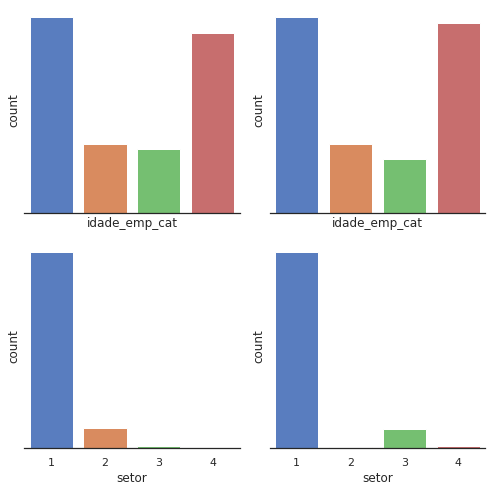

In [ ]:
#CONFERINDO O MODELO X O PORTFOLIO

sns.set(style="white", palette="muted", color_codes=True)

# Set up the matplotlib figure
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
sns.despine(left=True)

#GRÁFICOS - COLUNA 1 PORTFOLIO/ COLUNA 2 - RECOMENDAÇÕES
#LINHA 1 - IDADE DA EMPRESA
sns.countplot(port_1.idade_emp_cat, ax=axes[0, 0])
sns.countplot(recomendados_port1_metrics.idade_emp_cat.sample(port_1.shape[0]), ax=axes[0, 1])

#LINHA 2 - SETOR
sns.countplot(port_1.setor, ax=axes[1, 0])
sns.countplot(recomendados_port1_metrics.setor.sample(port_1.shape[0]), ax=axes[1, 1])

plt.setp(axes, yticks=[])
plt.tight_layout()



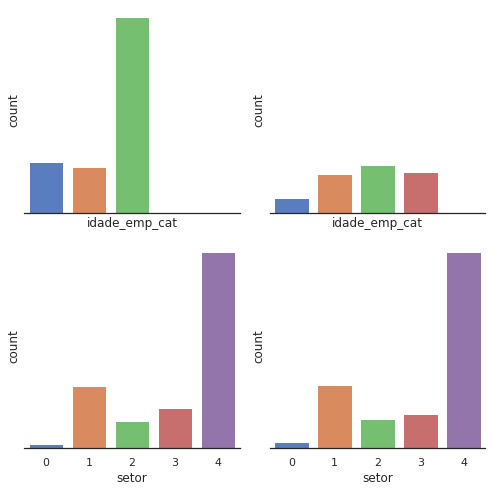

In [ ]:
#CONFERINDO O MODELO X O PORTFOLIO2

sns.set(style="white", palette="muted", color_codes=True)

# Set up the matplotlib figure
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
sns.despine(left=True)

#GRÁFICOS - COLUNA 1 PORTFOLIO/ COLUNA 2 - RECOMENDAÇÕES
#LINHA 1 - IDADE DA EMPRESA
sns.countplot(port_2.idade_emp_cat, ax=axes[0, 0])
sns.countplot(recomendados_port2_metrics.idade_emp_cat.sample(port_2.shape[0]), ax=axes[0, 1])

#LINHA 2 - SETOR
sns.countplot(port_2.setor, ax=axes[1, 0])
sns.countplot(recomendados_port2_metrics.setor.sample(port_2.shape[0]), ax=axes[1, 1])

plt.setp(axes, yticks=[])
plt.tight_layout()

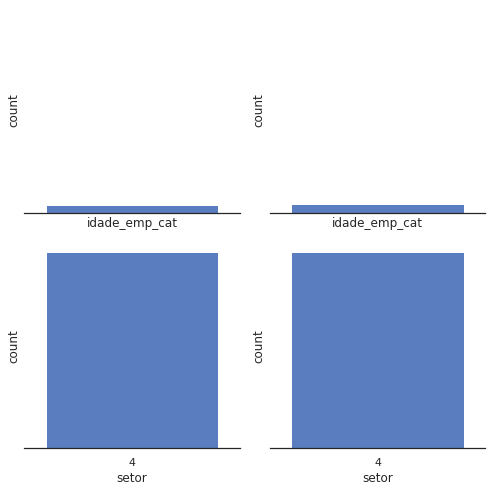

In [ ]:
#CONFERINDO O MODELO X O PORTFOLIO3

sns.set(style="white", palette="muted", color_codes=True)

# Set up the matplotlib figure
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
sns.despine(left=True)

#GRÁFICOS - COLUNA 1 PORTFOLIO/ COLUNA 2 - RECOMENDAÇÕES
#LINHA 1 - IDADE DA EMPRESA
sns.countplot(port_3.idade_emp_cat, ax=axes[0, 0])
sns.countplot(recomendados_port3_metrics.idade_emp_cat.sample(port_3.shape[0]), ax=axes[0, 1])

#LINHA 2 - SETOR
sns.countplot(port_3.setor, ax=axes[1, 0])
sns.countplot(recomendados_port3_metrics.setor.sample(port_3.shape[0]), ax=axes[1, 1])

plt.setp(axes, yticks=[])
plt.tight_layout()